In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import os
import numpy as np
np.seterr(invalid='ignore')
from PPP import PPP
from defense_PPP import defense_PPP
from court import create_court
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import plotly.graph_objects as go
pd.options.display.max_columns = 999
from get_stats import get_stats
from trial import get_stats2

game = '11.27.23_Clippers'
total = '!season_totals'
opponent = game[9:]

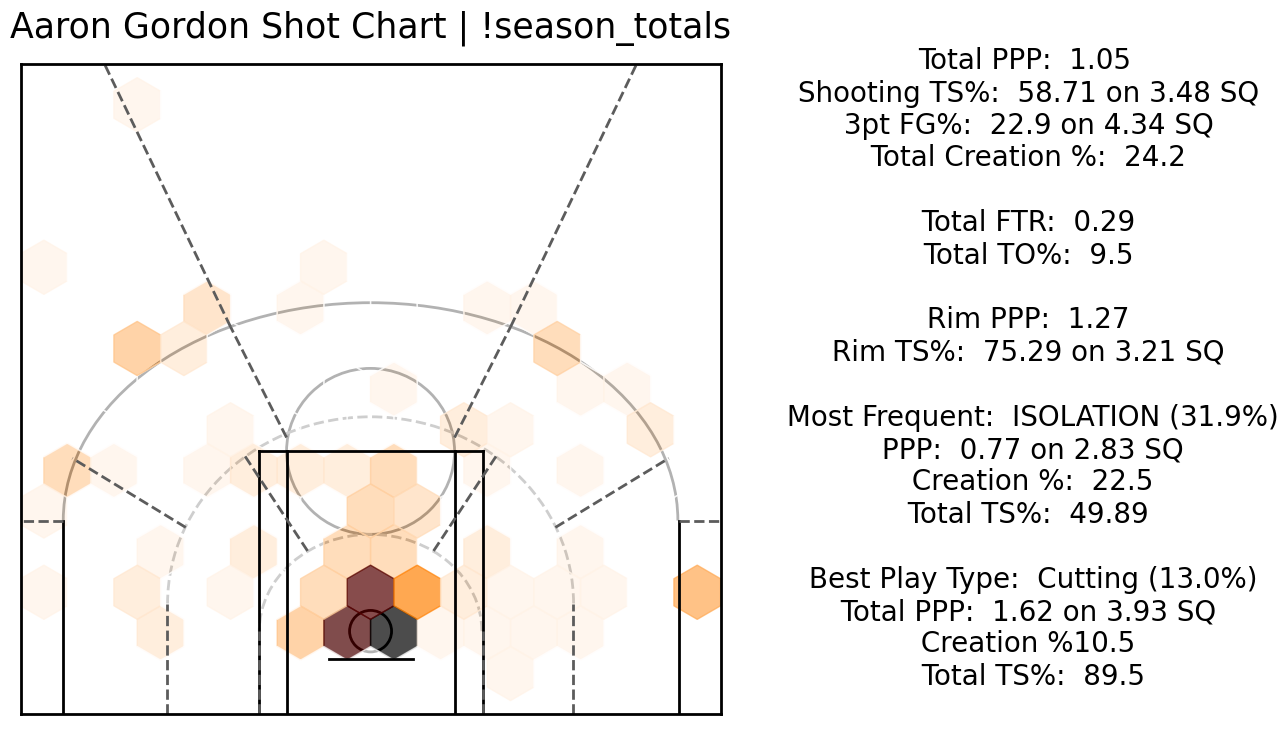

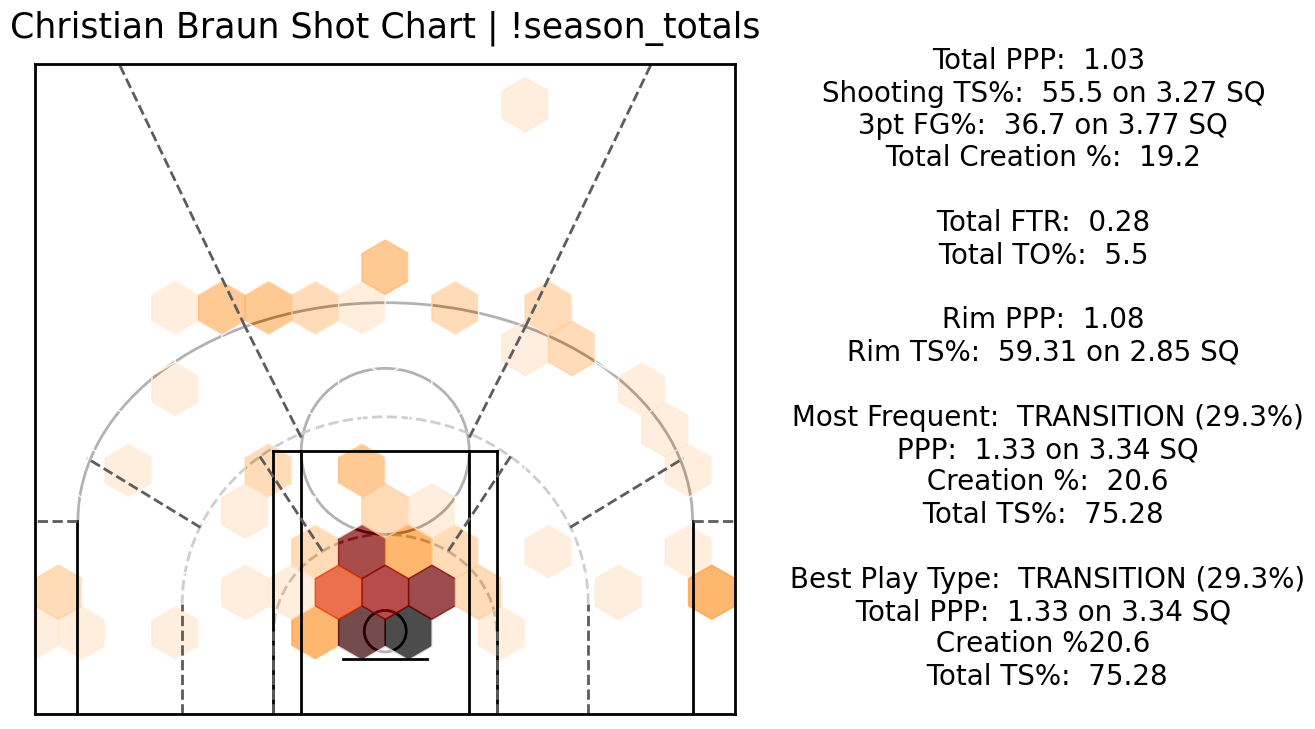

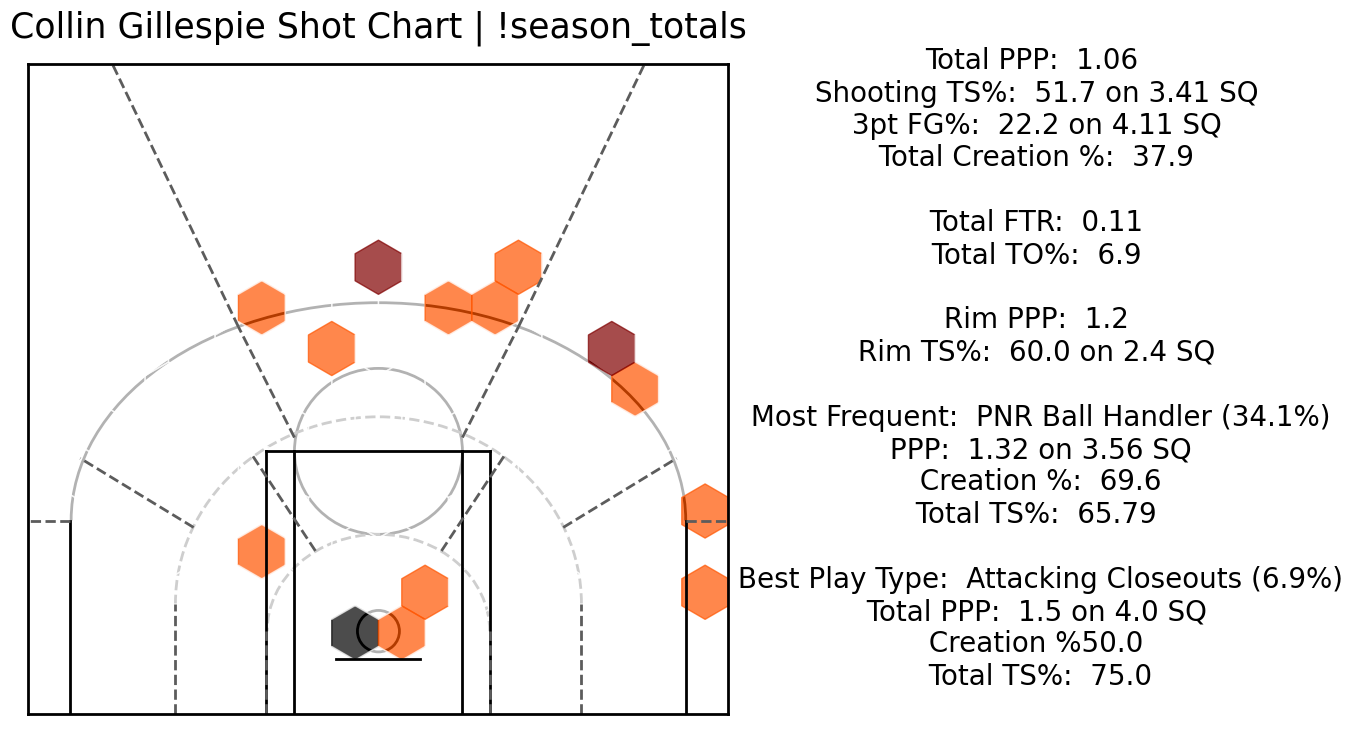

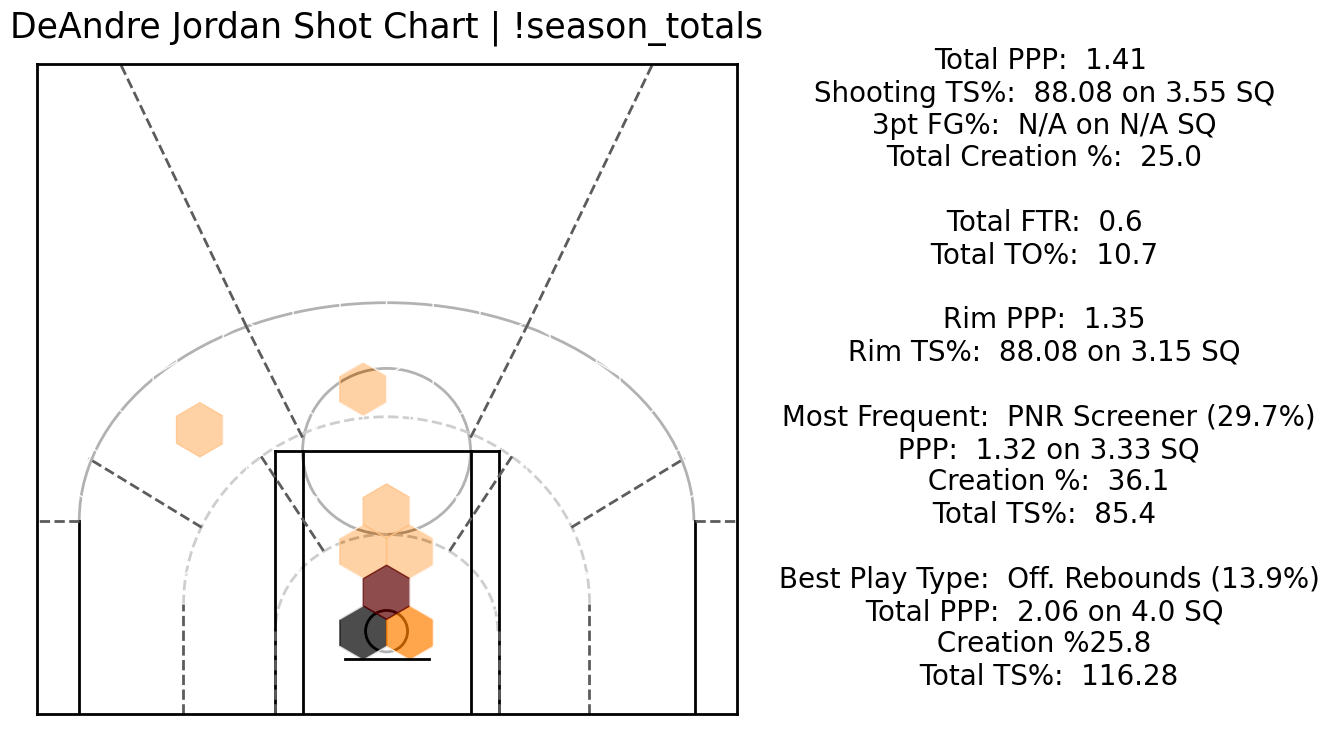

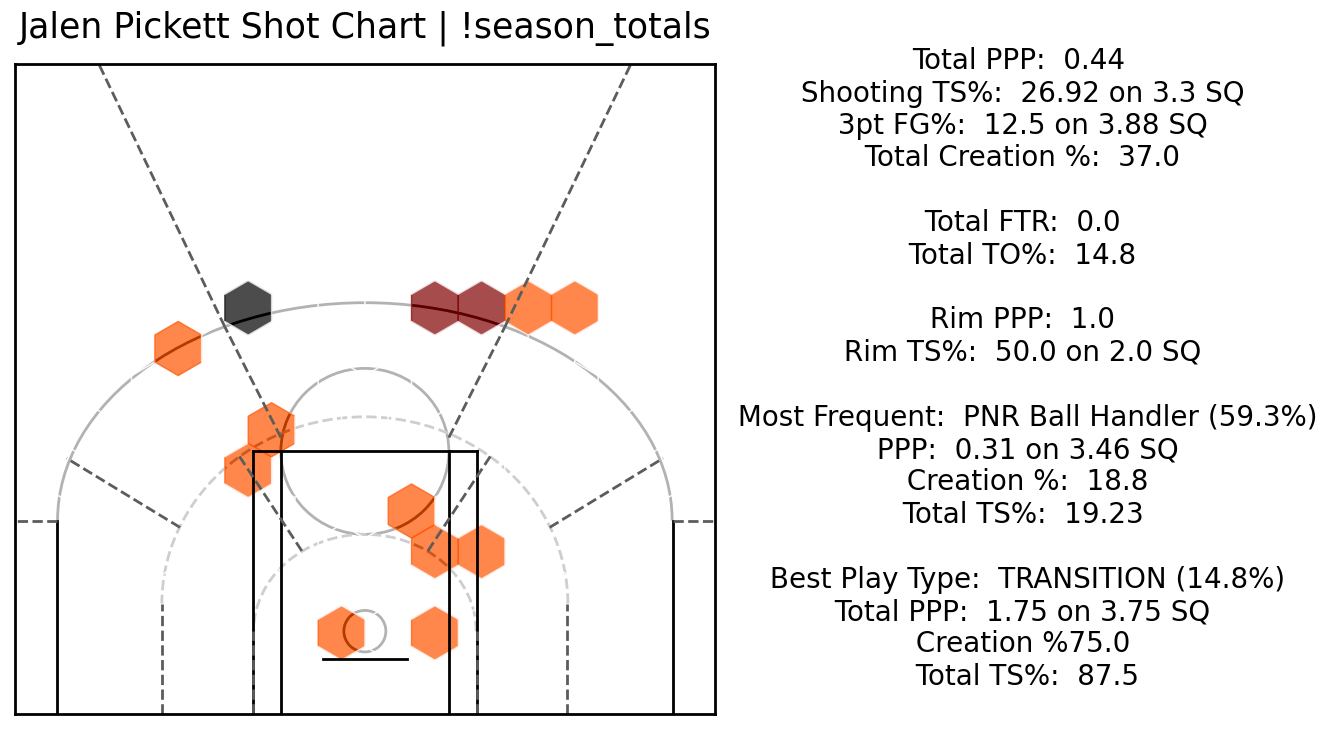

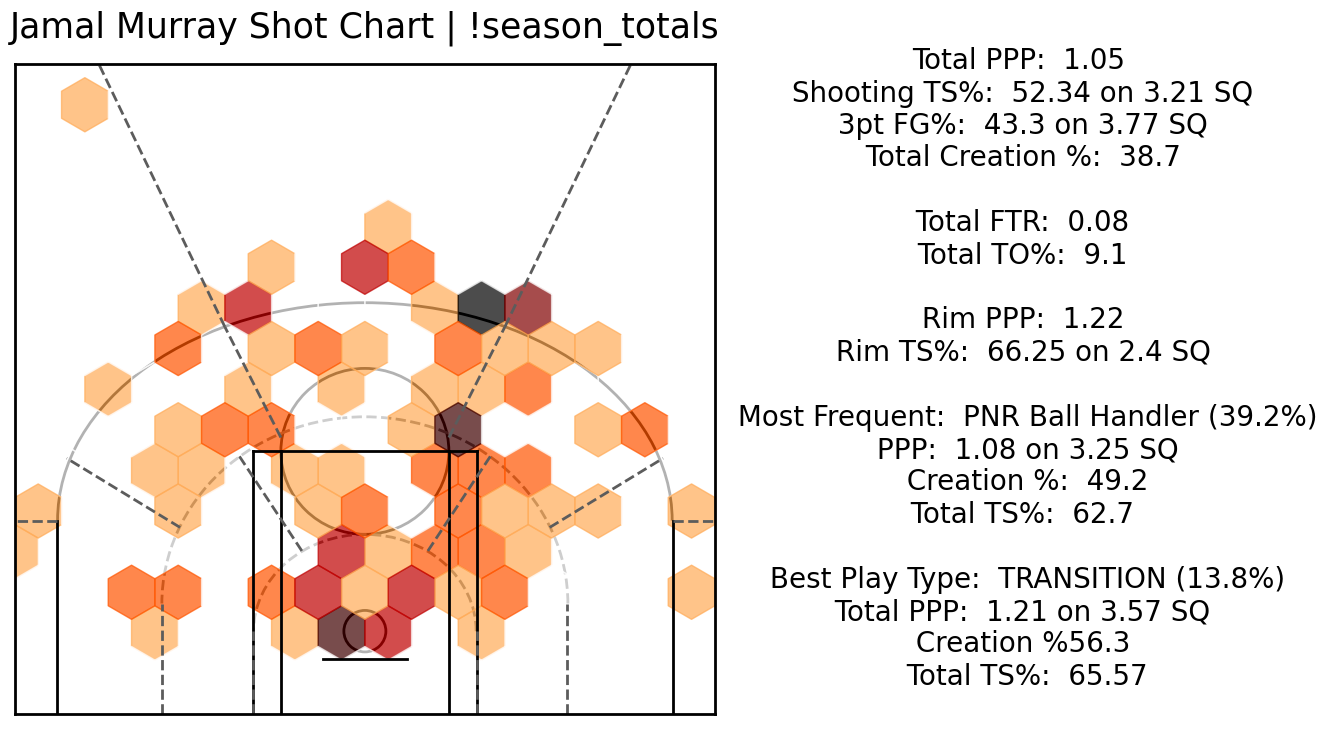

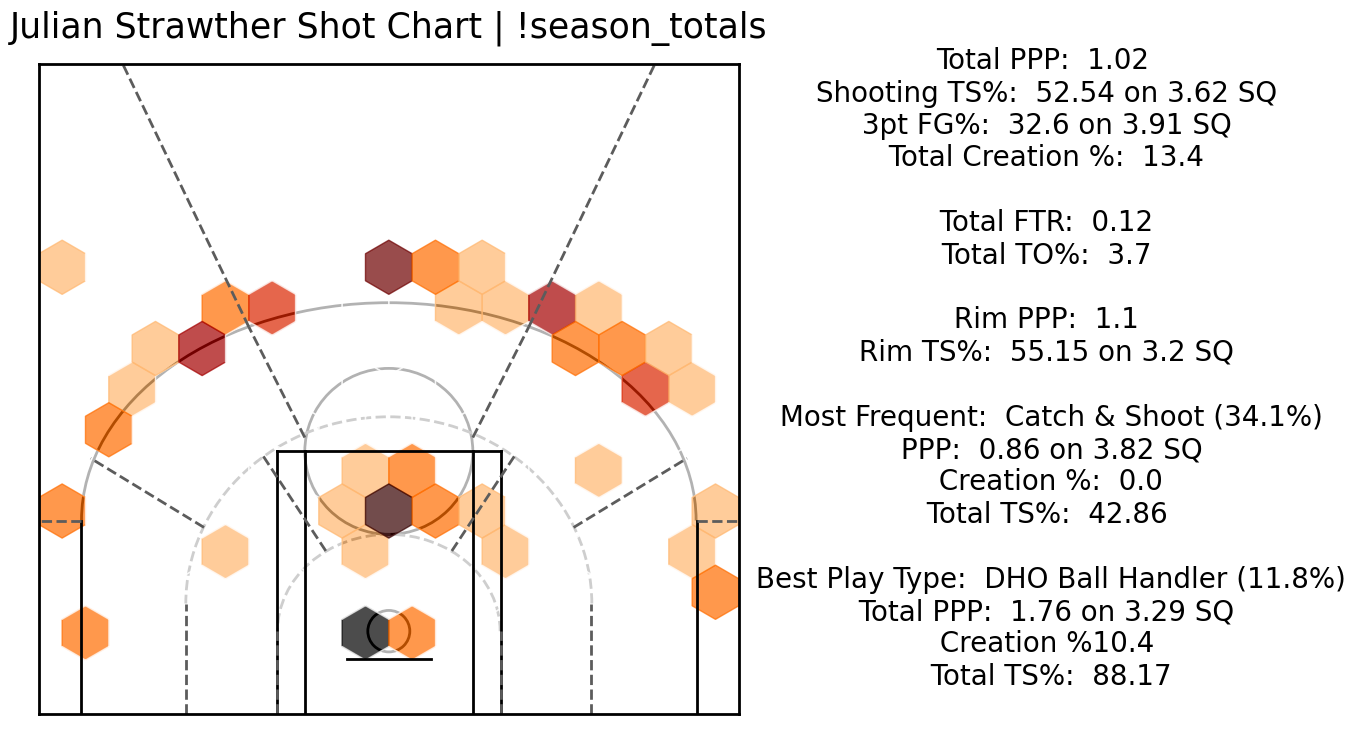

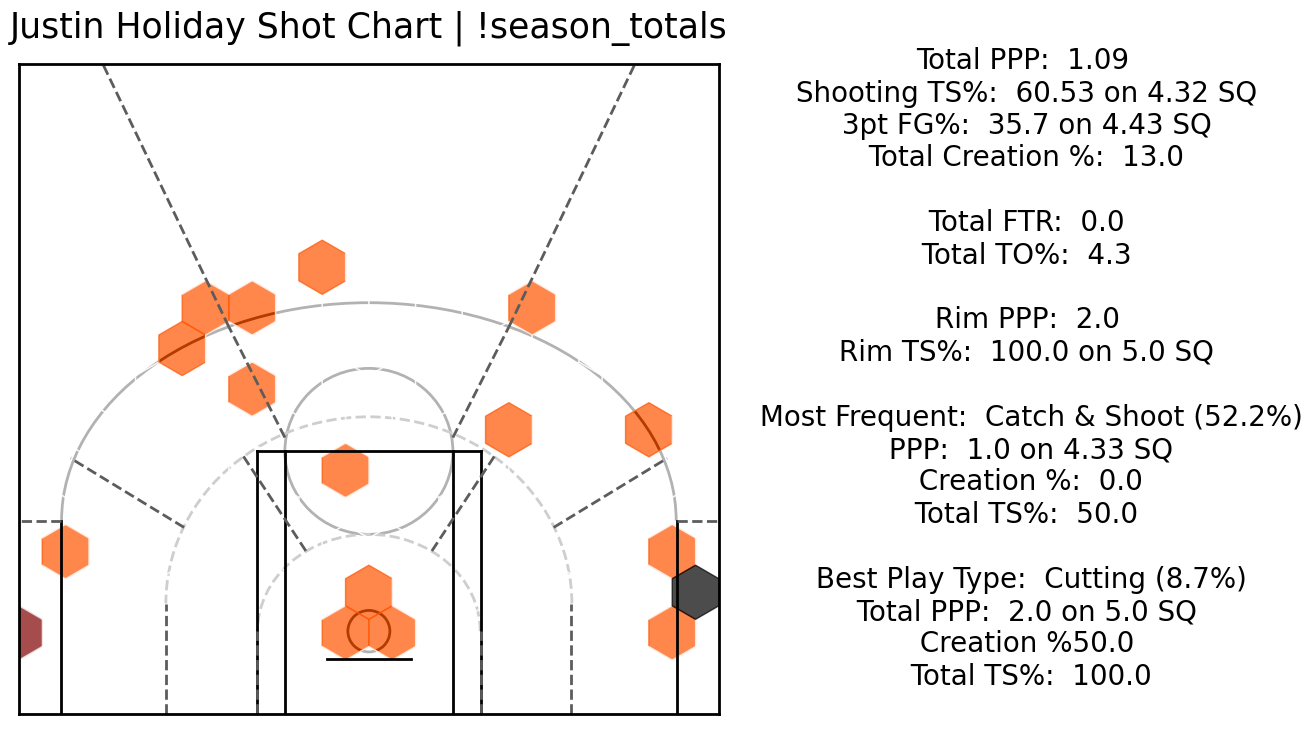

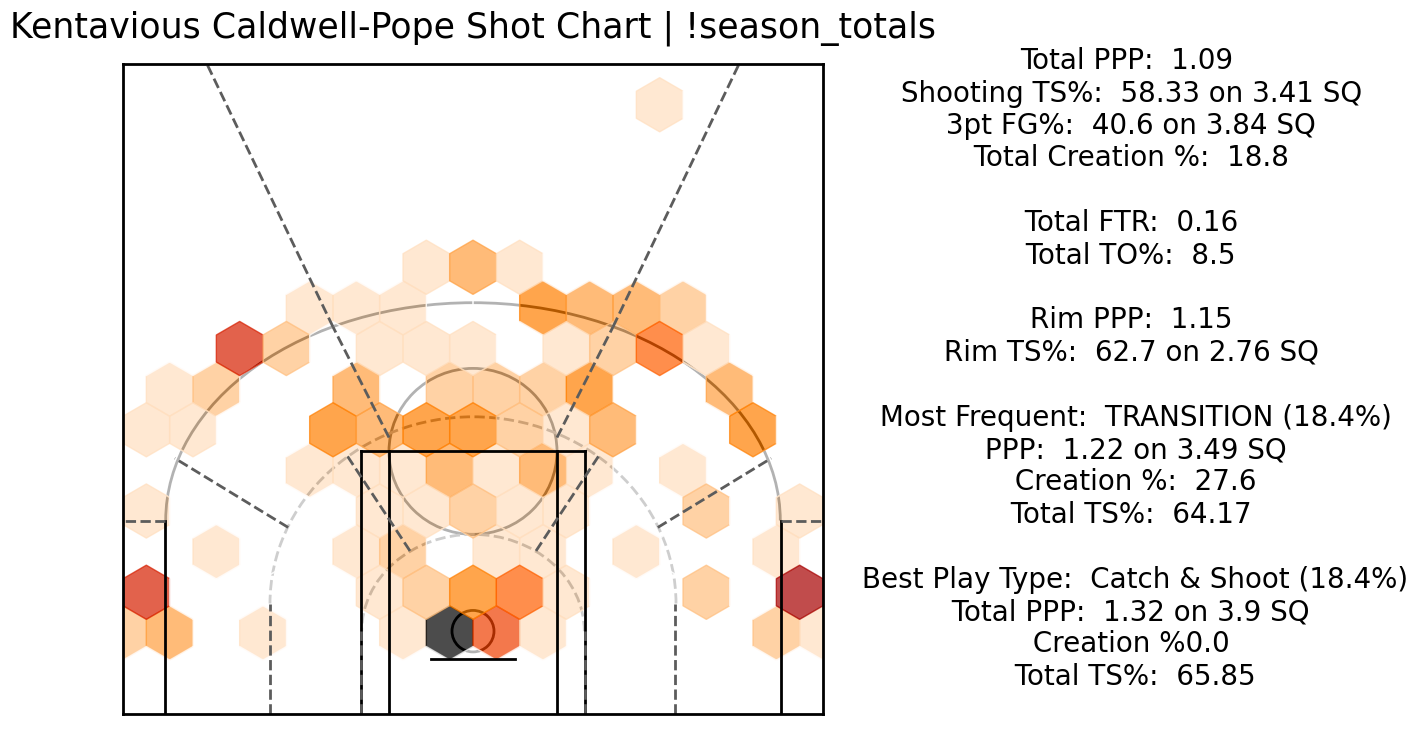

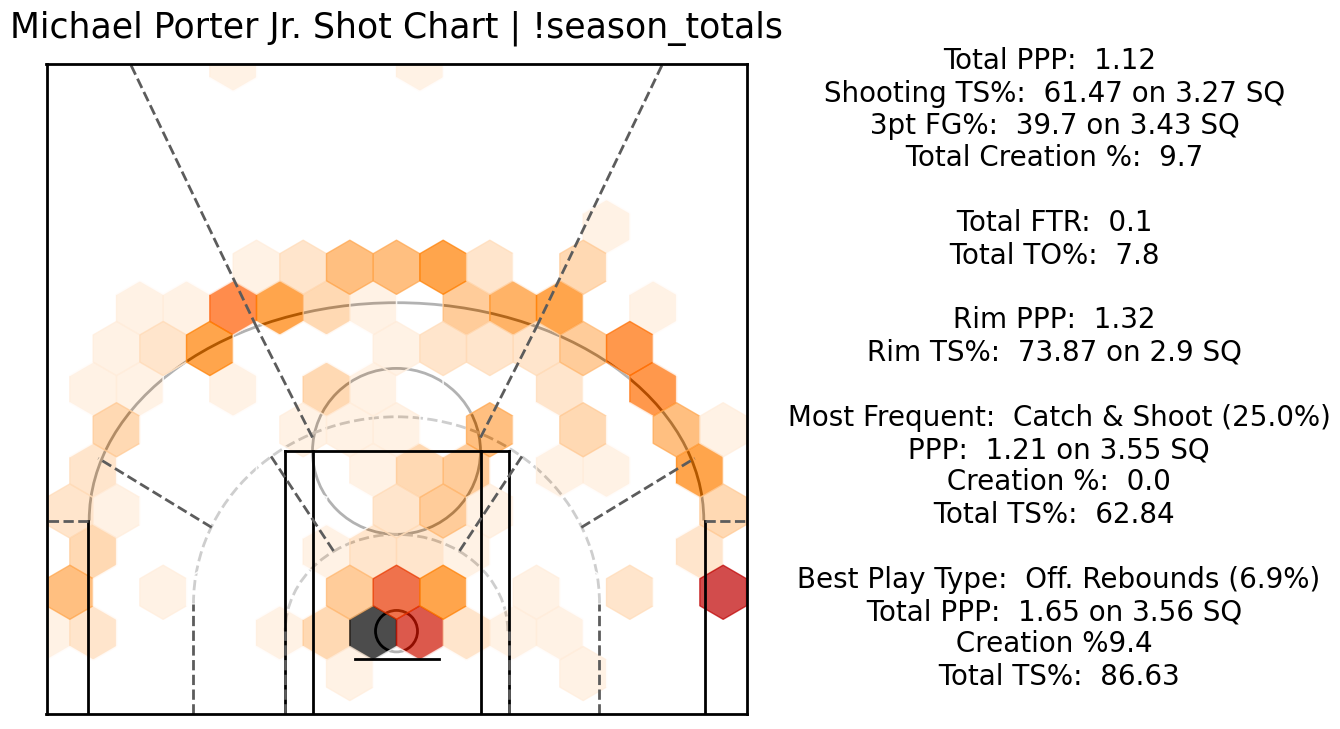

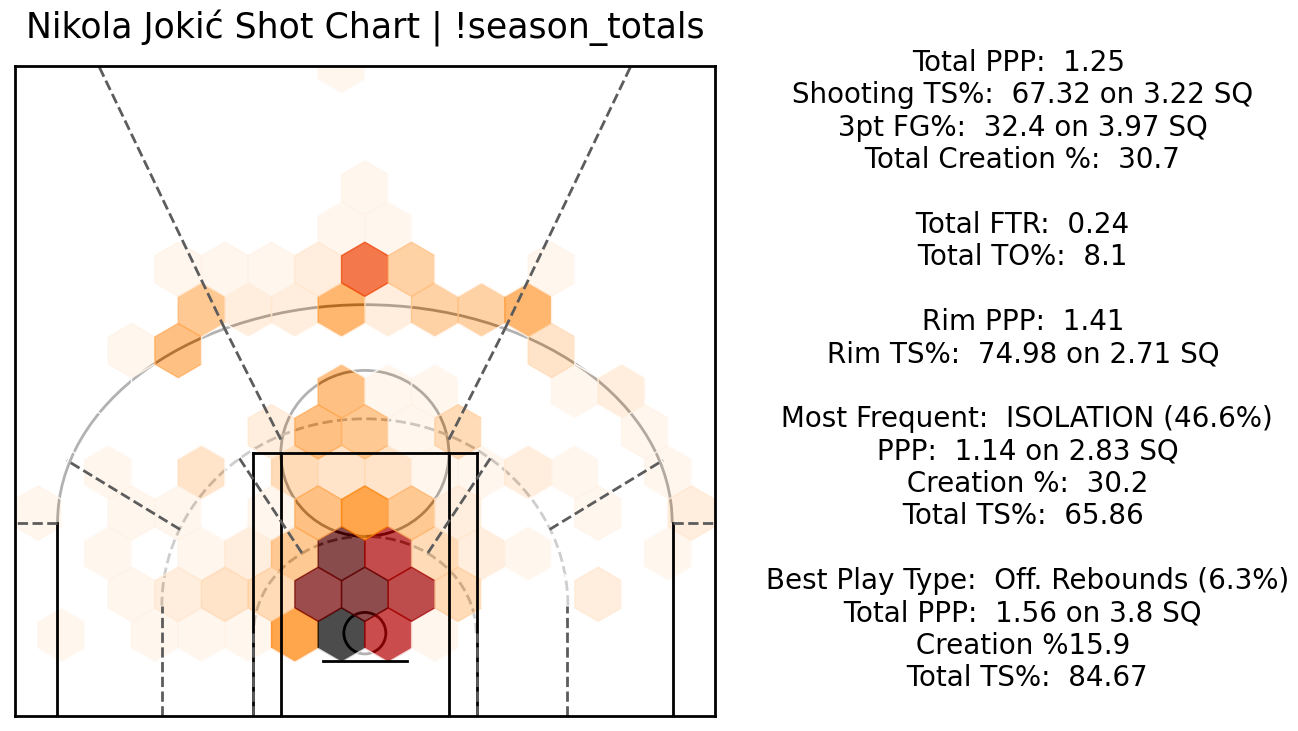

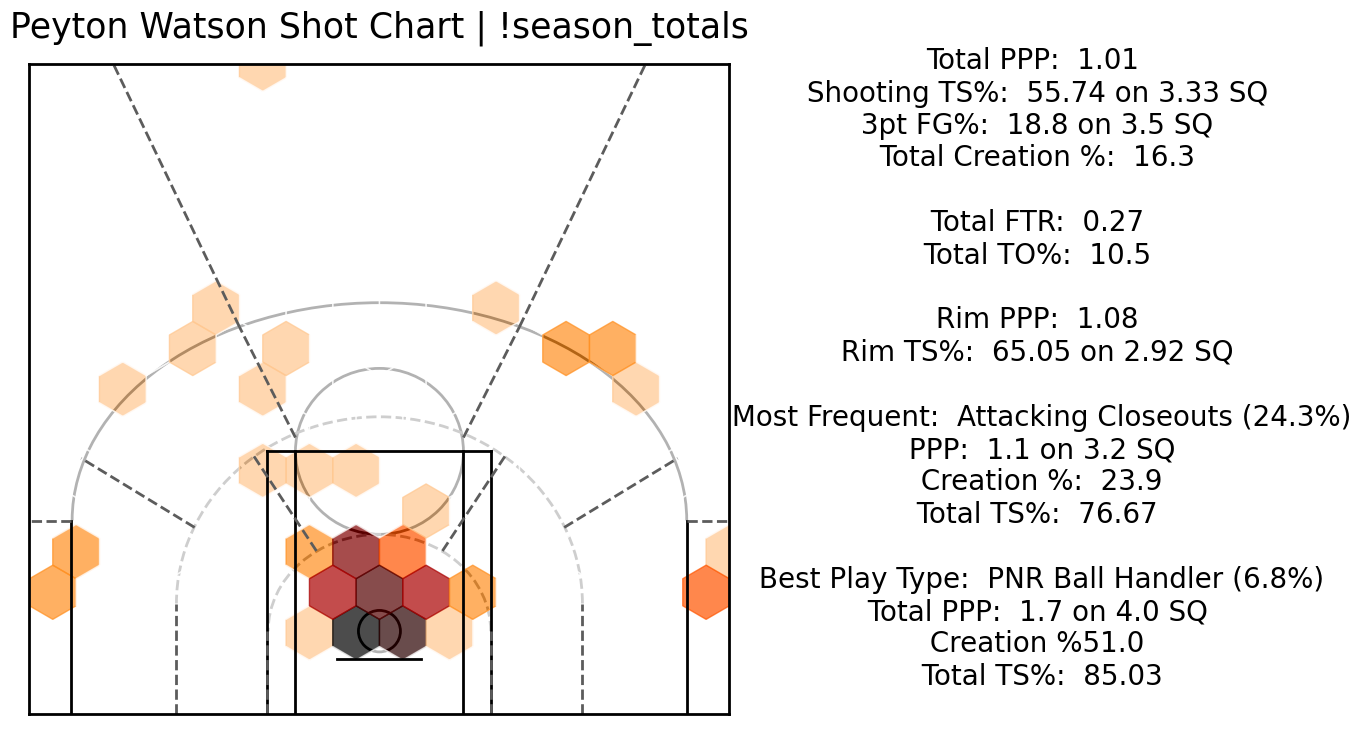

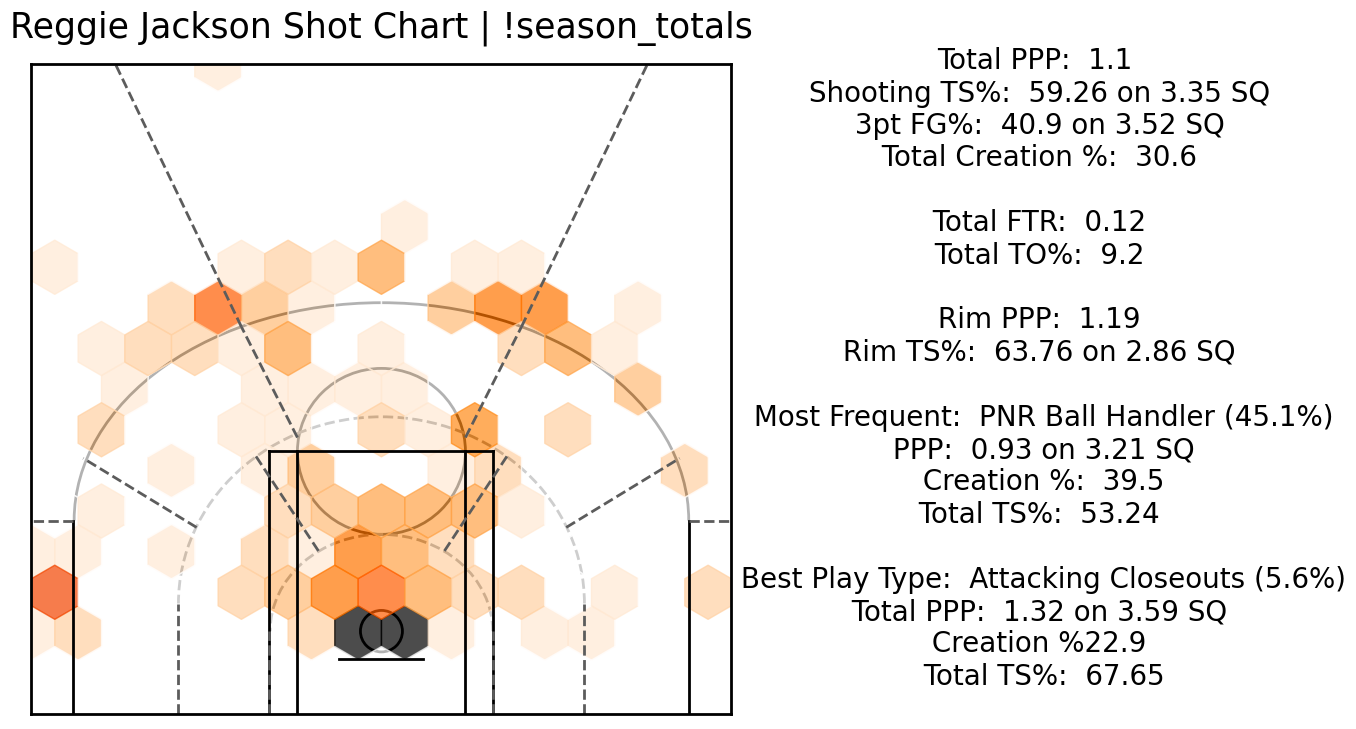

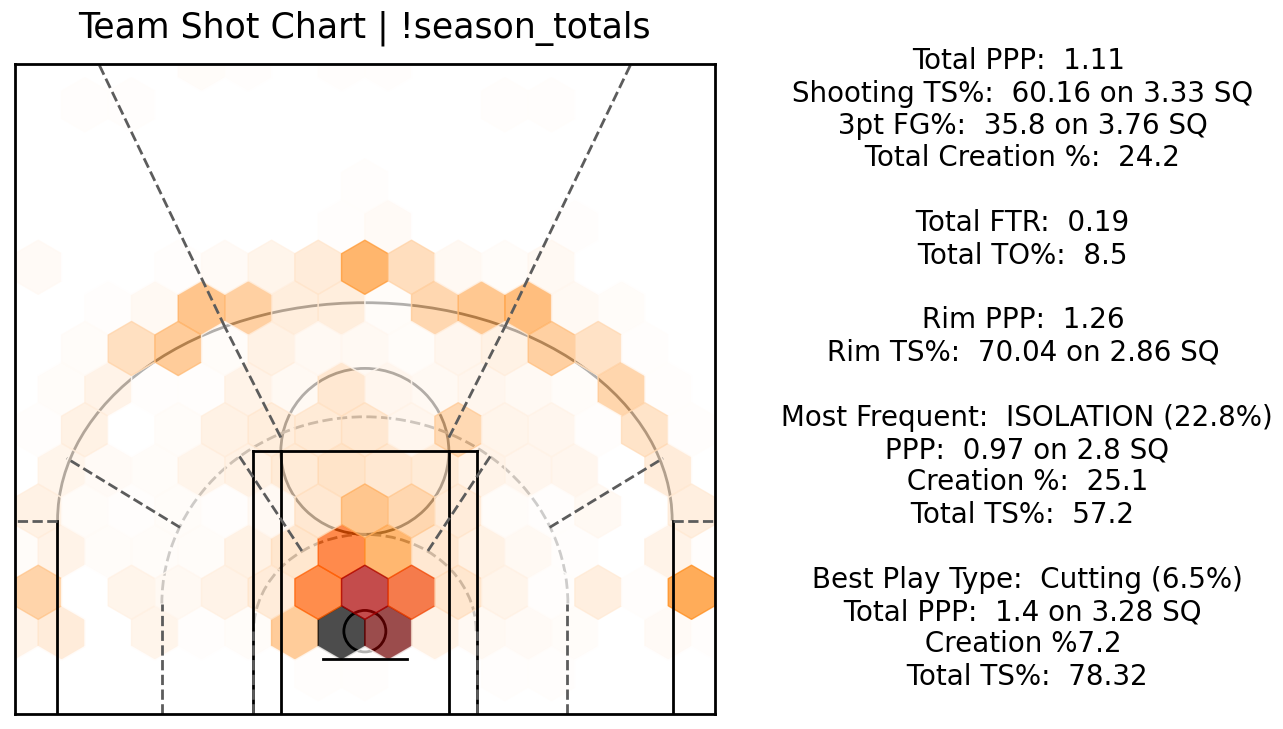

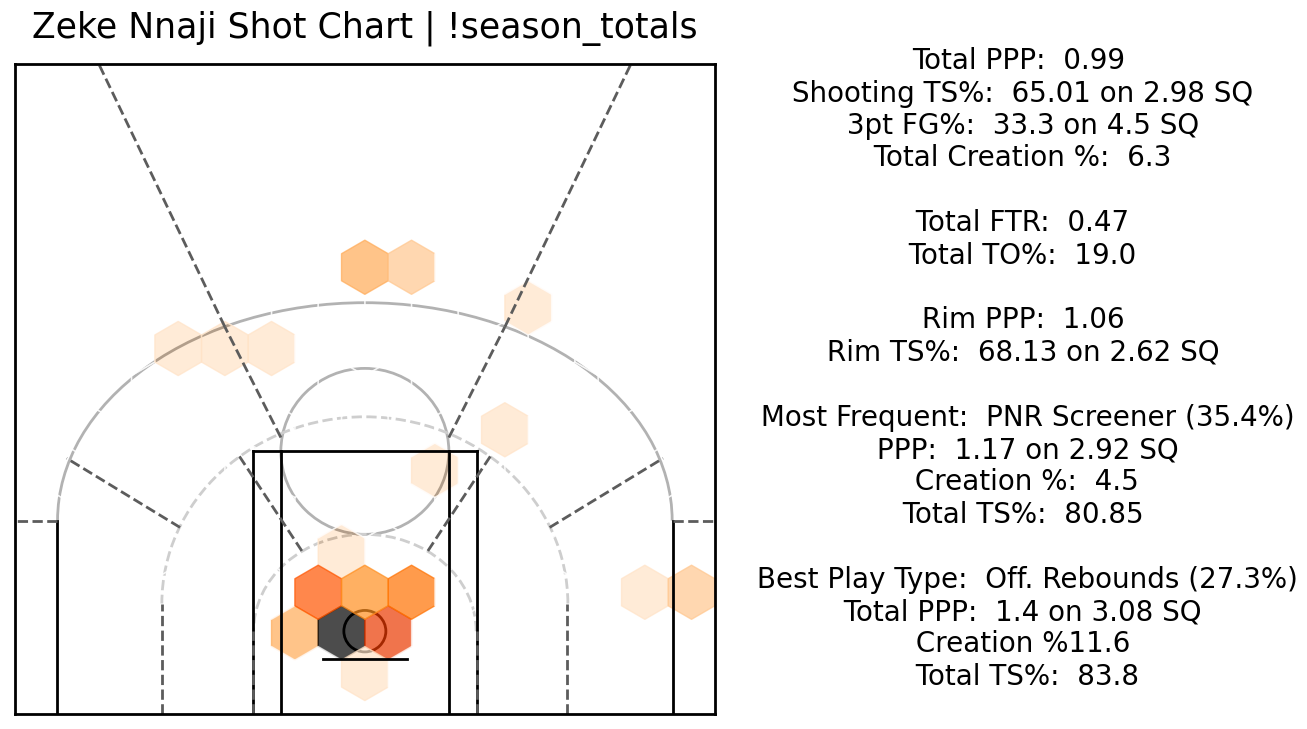

In [2]:
total_folder = 'data/!season_totals/Nuggets/Offense'
game_dir = f'data/{game}/Nuggets/Defense'

players = []
for subdir, dirs, files in os.walk(total_folder):
    for file in files:
        if file[-5:] == '.json':
            player = file[:-5]
            players.append(player)

for player in players:
    if player[-10:] != 'checkpoint':
        if player not in  []:
            get_stats2('Nuggets', player, total, 'Offense')

In [48]:

def get_series_stats(team):
    
    offense_defense = ['Offense', 'Defense']
    games = []
    series_data = {'Nuggets': {'Offense': {}, 'Defense': {}}, team: {'Offense': {}, 'Defense': {}}}
    
    for game in os.listdir('data'):
        if game[9:] == team:
            games.append(game)
            
    for game in games:
        for team in series_data.keys():
            for off_def in offense_defense:
                
                path = f'data/{game}/{team}/{off_def}'
                
                for subdir, dirs, file in os.walk(path):
                    for player in file:
                        
                        if (player[-4:] != '.png') and (player[-15:] != 'checkpoint.json'):
                            
                            file_path = f'{path}/{player}'
                            with open (file_path, 'r') as o:
                                file = json.load(o)
                            
                            if player[:-5] not in series_data[team][off_def].keys():
                                series_data[team][off_def][player[:-5]] = file
                    
    return series_data

series_data = get_series_stats('Rockets')
series_data['Rockets']['Offense'].keys()

dict_keys(['Aaron Holiday', 'Alperen Şengün', 'Dillon Brooks', 'Fred VanVleet', 'Jabari Smith Jr.', "Jae'Sean Tate", 'Jalen Green', 'Jeff Green', 'Jock Landale', 'Tari Eason', 'Team', 'Reggie Bullock'])

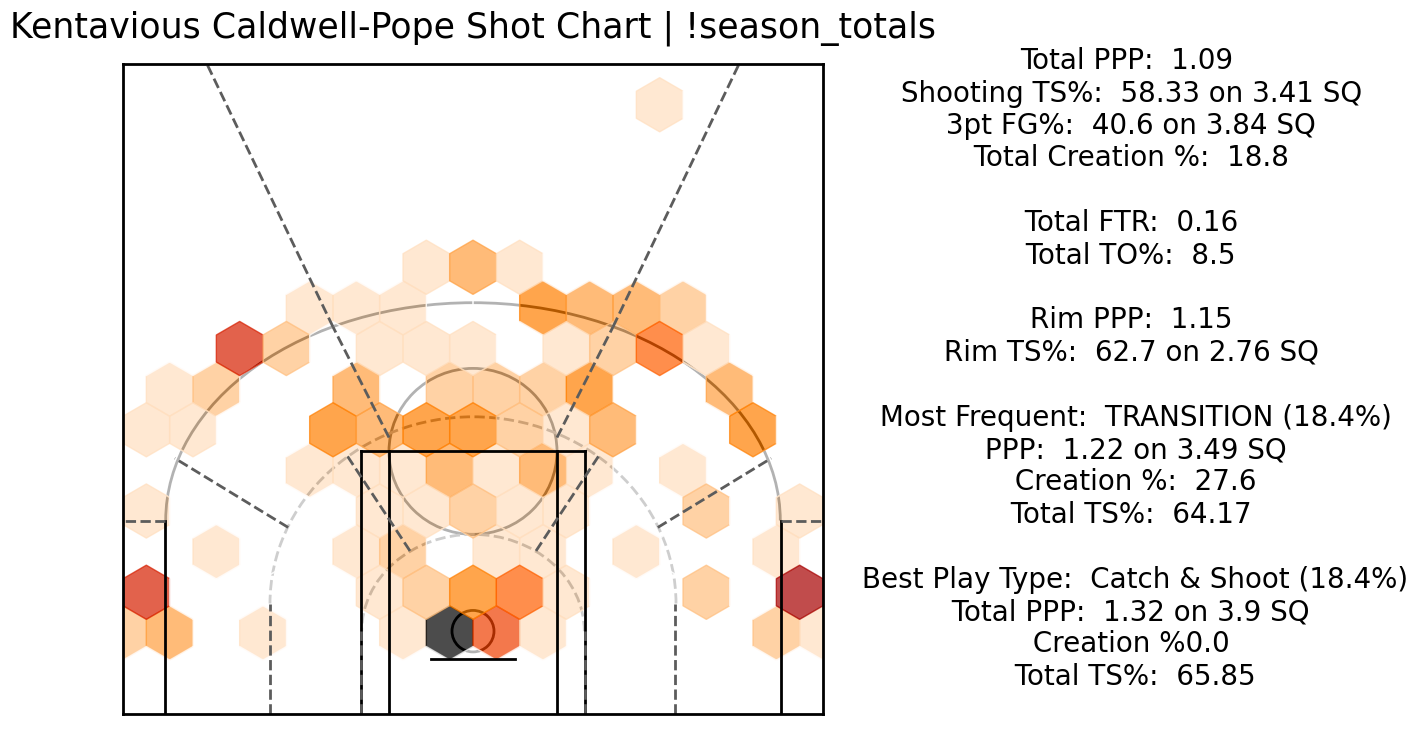

In [3]:
PPP_data, rim_PPP, nugg_off_fig = get_stats2('Nuggets', 'Kentavious Caldwell-Pope', total, 'Offense')

In [4]:
PPP_data

Total PPP % of Poss. Total TO Total Creation % Total FTR  \
PNR Ball Handler         0.92       18.0        6             29.9      0.23   
PNR Screener             1.63        3.0        1             14.8       1.0   
DHO Ball Handler         0.91       17.7        3             23.9      0.03   
DHO Screener              0.0        0.4        0              0.0       0.0   
ISOLATION                 0.8        6.2        4             14.5       0.5   
TRANSITION               1.22       18.4        2             27.6      0.26   
Attacking Closeouts      1.09        8.2        1             10.9      0.19   
Catch & Shoot            1.32       18.4        0              0.0       0.0   
Off Ball Screens          0.9        4.5        0             10.0       0.0   
Cutting                  1.23        3.3        2             33.3      0.75   
Off. Rebounds             1.4        2.2        0             20.0       0.0   
TOTAL                    1.09        223      8.5             18.8      0.16   

                    Total TS% Total SQ Total 2pt FGA Total 2pt FG%  \
PNR Ball Handler        54.28     3.19            23          52.2   
PNR Screener            95.49      4.5             2         100.0   
DHO Ball Handler         49.4     3.25            27          48.1   
DHO Screener              0.0      4.0             0           N/A   
ISOLATION               56.35     2.88             5          40.0   
TRANSITION              64.17     3.49            22          59.1   
Attacking Closeouts     59.24     3.25            14          64.3   
Catch & Shoot           65.85      3.9             0           N/A   
Off Ball Screens         45.0      3.3             6          50.0   
Cutting                 92.21      2.0             3          66.7   
Off. Rebounds            70.0      3.2             4          50.0   
TOTAL                   59.87     3.41           106          54.7   

                    Total 2pt SQ Total 3pt FGA Total 3pt FG% Total 3pt SQ  \
PNR Ball Handler             3.0             8          25.0         3.75   
PNR Screener                 4.0             2          50.0          5.0   
DHO Ball Handler            3.04             9          33.3         3.89   
DHO Screener                 N/A             1           0.0          4.0   
ISOLATION                    2.6             3          33.3         3.33   
TRANSITION                  3.27            13          38.5         3.85   
Attacking Closeouts         3.21             2           0.0          3.5   
Catch & Shoot                N/A            41          43.9          3.9   
Off Ball Screens            3.33             4          25.0         3.25   
Cutting                     1.33             1         100.0          4.0   
Off. Rebounds               2.75             1         100.0          5.0   
TOTAL                       3.06            85          38.8         3.86   

                    Shooting PPP % of Shooting Poss. Shooting TO  \
PNR Ball Handler            0.93                15.5           6   
PNR Screener                1.56                 3.2           1   
DHO Ball Handler            0.87                16.6           3   
DHO Screener                 0.0                 0.6           0   
ISOLATION                   0.77                 6.5           4   
TRANSITION                  1.08                16.4           2   
Attacking Closeouts          1.1                 9.0           1   
Catch & Shoot               1.32                22.7           0   
Off Ball Screens            0.78                 5.0           0   
Cutting                     0.82                 2.7           2   
Off. Rebounds                1.0                 2.2           0   
TOTAL                       1.04                 181        10.5   

                    Shooting Freq. Shooting FTR Shooting TS% Shooting SQ  \
PNR Ball Handler              70.1         0.37        58.88        2.89   
PNR Screener                 

C:\Users\nickd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


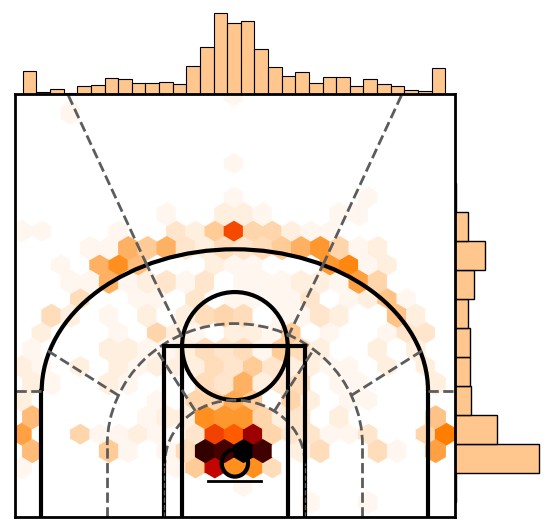

In [37]:
path = f'data/!season_totals/Nuggets/Offense/Team.json'

with open (path, 'r') as o:
    offense_file = json.load(o)
    
shots_x = [shot[0][0] for shot in offense_file['ovr_data']['shooting_locations']]
shots_y = [shot[0][1] + 60 for shot in offense_file['ovr_data']['shooting_locations']]
shots_results = [shot[1] for shot in offense_file['ovr_data']['shooting_locations']]

shots_df = pd.DataFrame(columns=['LOC_X', 'LOC_Y', 'RESULT'])
shots_df['LOC_X'] = shots_x
shots_df['LOC_Y'] = shots_y
shots_df['RESULT'] = shots_results

cmap=plt.cm.gist_heat_r

joint_shot_chart = sns.jointplot(shots_df.LOC_X, shots_df.LOC_Y,
                                 kind='hex', space=0, color=cmap(.15), cmap=cmap)

joint_shot_chart.fig.set_size_inches(7,6.5)

ax = joint_shot_chart.ax_joint
create_court(ax, 'black')

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

#ax.set_title("Nuggets FGA's 2023-24", y=1.2, fontsize=18)